# Netflix Movie data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '../datasets/mymoviedb.csv'

In [3]:
df = pd.read_csv(path, encoding='utf-8', engine='python')

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

# Drop columns

In [6]:
drop_col = [ 'Overview' , 'Original_Language' , 'Poster_Url'  ]
df.drop(columns=drop_col , axis=1,inplace=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [7]:
df.shape

(9837, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9837 non-null   object 
 1   Title         9828 non-null   object 
 2   Popularity    9827 non-null   float64
 3   Vote_Count    9827 non-null   object 
 4   Vote_Average  9827 non-null   object 
 5   Genre         9826 non-null   object 
dtypes: float64(1), object(5)
memory usage: 461.2+ KB


# Check Null vaues

In [9]:
df.isnull().sum()

Release_Date     0
Title            9
Popularity      10
Vote_Count      10
Vote_Average    10
Genre           11
dtype: int64

# Drop Null values

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [11]:
df.shape

(9826, 6)

# change the datatypes

In [12]:
df['Vote_Count'] = df['Vote_Count'].astype(np.int64)
df['Vote_Average'] = df['Vote_Average'].astype(np.float64)

In [13]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [14]:
df['Release_Date'] = df['Release_Date'].dt.year

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9826 non-null   int32  
 1   Title         9826 non-null   object 
 2   Popularity    9826 non-null   float64
 3   Vote_Count    9826 non-null   int64  
 4   Vote_Average  9826 non-null   float64
 5   Genre         9826 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 499.0+ KB


In [16]:
df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000,9826.000000
mean,2006.202931,40.323951,1392.943721,6.439467
std,15.686202,108.879332,2611.303856,1.129797
min,1902.000000,13.354000,0.000000,0.000000
25%,2000.000000,16.128250,146.000000,5.900000
50%,2011.000000,21.195000,444.000000,6.500000
75%,2017.000000,35.179250,1376.000000,7.100000
max,2024.000000,5083.954000,31077.000000,10.000000


In [34]:
def plotBarGraph(X,Y,xLabel,yLabel, color='blue'):
    
    plt.figure(figsize=(15,5))
    
    plt.bar( x=X,height=Y ,color=color)
           
    plt.xlabel(xLabel)
            
    plt.ylabel(yLabel)
    plt.xticks(rotation=45, ha='right')
    plt.show()
    

# Top 20 years of more movies released

In [18]:
movie_release_year = df['Release_Date'].value_counts().head(20)

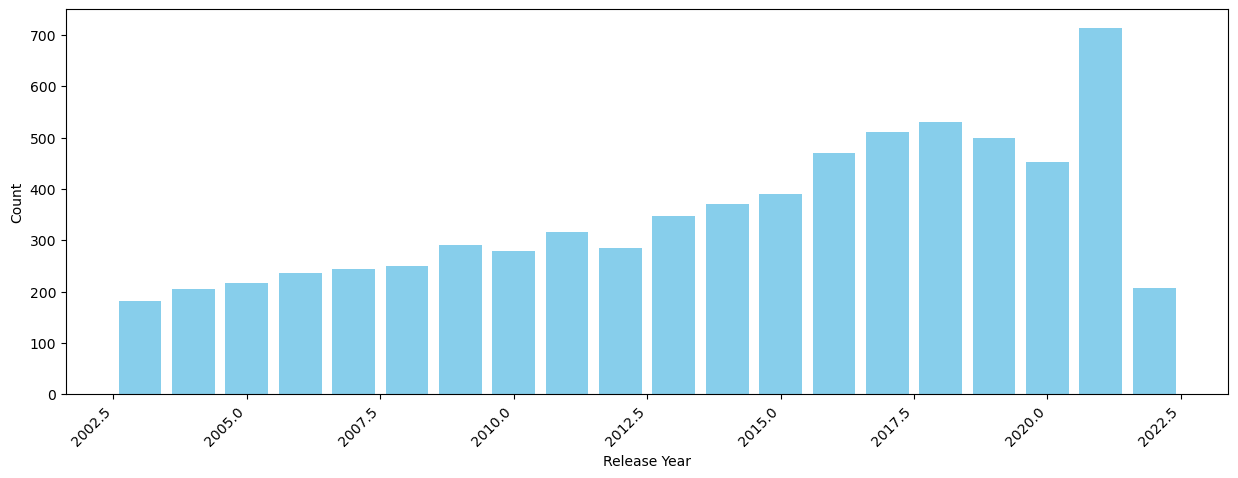

In [35]:
plotBarGraph( movie_release_year.index , movie_release_year.values,'Release Year','Count','skyblue' )

# Different Genres 

In [20]:
from collections import Counter
genre_series = df['Genre'].dropna().str.split(', ')
genre_count = Counter([g for sublist in genre_series for g in sublist])

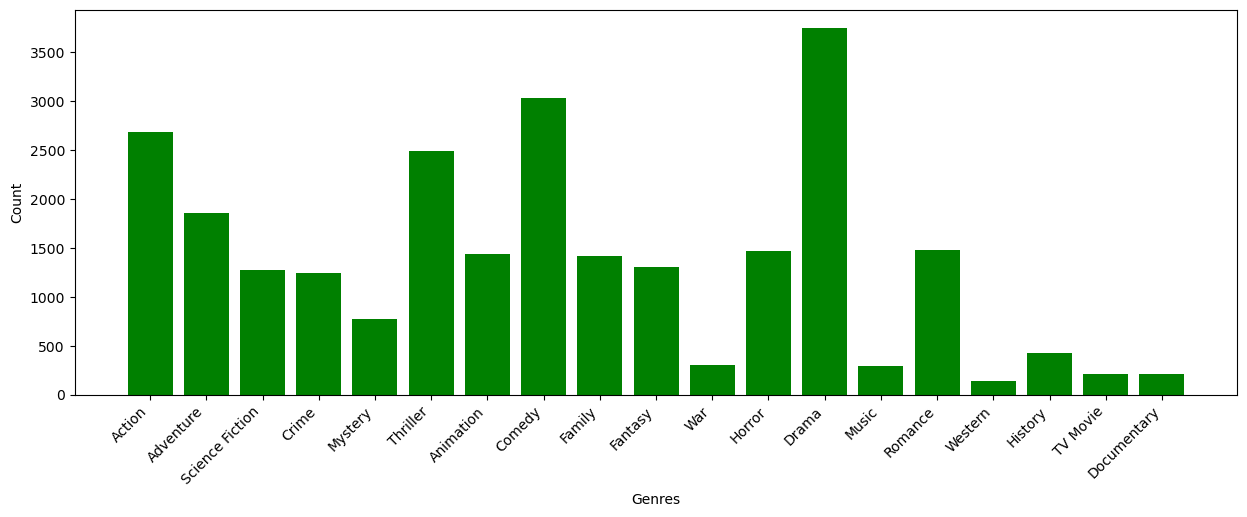

In [36]:
plotBarGraph(genre_count.keys(),genre_count.values(),'Genres','Count',color="green"  )

<Axes: title={'center': 'Average Popularity per Year'}, xlabel='Release_Date'>

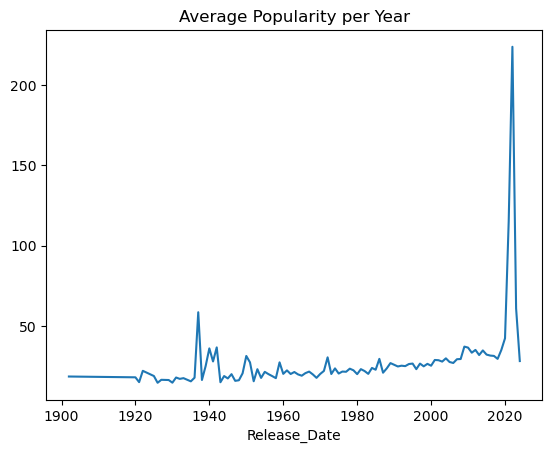

In [37]:
df.groupby('Release_Date')['Popularity'].mean().plot(kind='line', title='Average Popularity per Year')
plt.show()

# Popularity with year

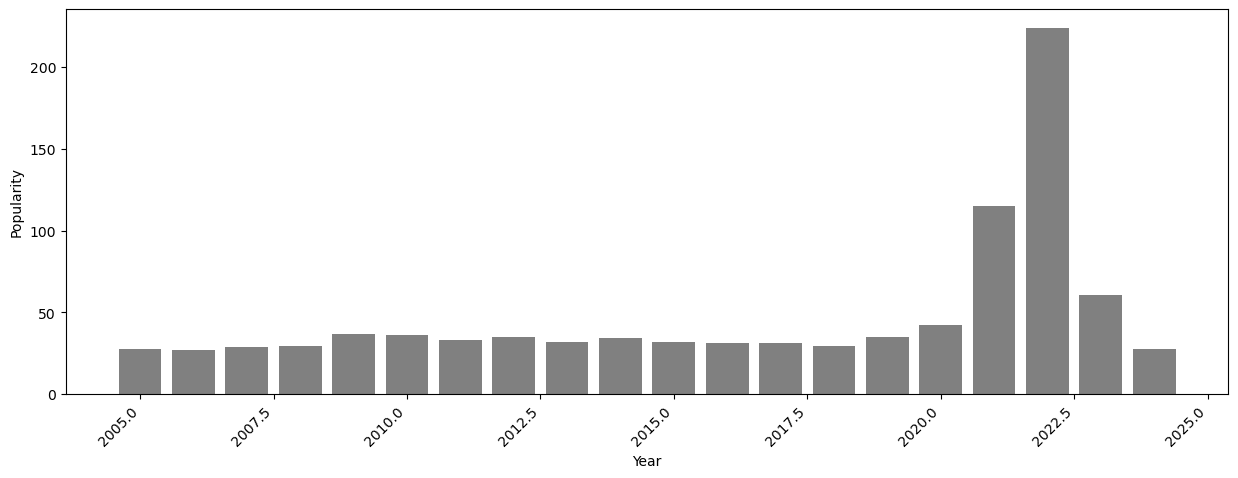

In [38]:
popularity = df.groupby('Release_Date')['Popularity'].mean().tail(20)

plotBarGraph( popularity.index , popularity.values , "Year" , "Popularity" , 'gray' )

In [26]:
def categorize_Rating(data,col,labels):
    
    edges = [
     data[col] .describe()['min'],
     data[col] .describe()['25%'],
     data[col] .describe()['50%'],
     data[col] .describe()['75%'],
     data[col] .describe()['max']
    ]
    
    data[col] = pd.cut( data[col] , edges,labels=labels,duplicates='drop'  )
    
    return data
    
    

In [27]:
labels = ['not popular','below average','average','popular']

df = categorize_Rating(df,'Vote_Average',labels)

In [32]:
ratings = df.Vote_Average.value_counts()

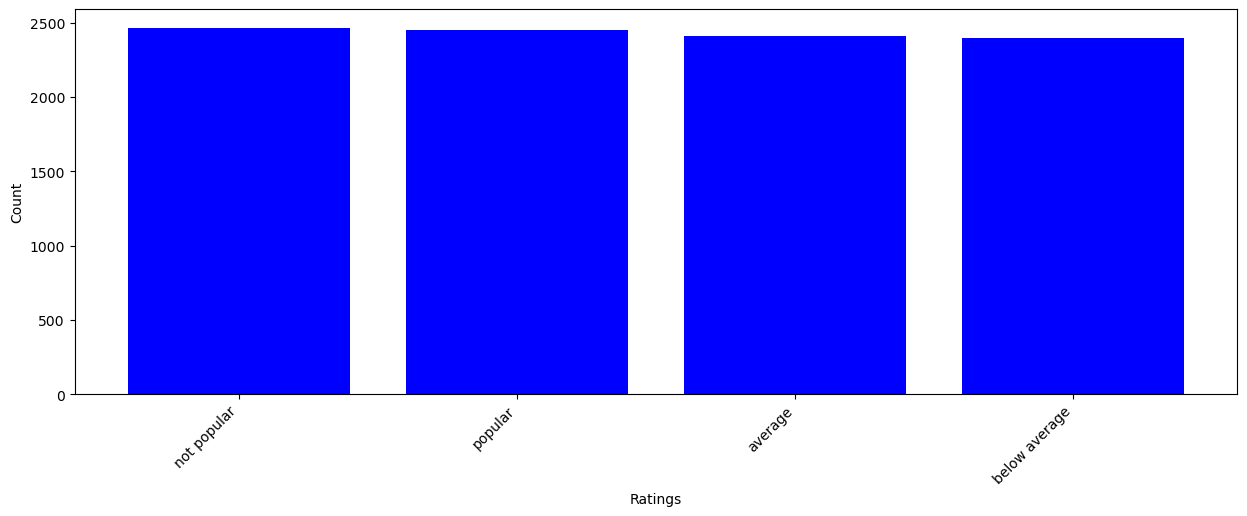

In [39]:
plotBarGraph( ratings.index , ratings.values , 'Ratings',"Count" )